In [5]:
import os
import sys
import pandas as pd

In [6]:
data = os.path.abspath(os.path.join('.','data', 'data.csv'))
price = os.path.abspath(os.path.join('.','data', 'price.csv'))

In [7]:
df = pd.read_csv(data)
price = pd.read_csv(price)

In [8]:
df.head()

,Channel,AuthorID,Author,Date,Content,Attachments,Reactions
0,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,369700858742571008,mantisclone,03/29/2023 1:02 AM,gm 👋 :Water_Wave: :Oceancopy:,NaN,NaN
1,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,843831770062913568,white_rider_,03/29/2023 4:37 PM,Good morning to all the @🧑‍💻Builder 🌊,NaN,NaN
2,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,563434444321587202,Maki#4920,03/29/2023 4:37 PM,**@White Rider just advanced to level 4!**,https://cdn.discordapp.com/attachments/1088751...,powerup (1)
3,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,194817764236460034,robinlehmann,03/29/2023 4:40 PM,https://tenor.com/view/hello-there-baby-yoda-m...,NaN,babyyodasoup (1)
4,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,387401160656683034,birususama,03/29/2023 4:40 PM,Good morning everyone 😀,NaN,🌅 (1)


In [9]:
price.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-21,0.017581,0.018038,0.016122,0.017467,0.017467,3018033
1,2019-08-22,0.017490,0.020865,0.017218,0.020830,0.020830,1768619
2,2019-08-23,0.020830,0.021381,0.019750,0.020479,0.020479,1565848
3,2019-08-24,0.020565,0.020807,0.019309,0.019705,0.019705,1470829
4,2019-08-25,0.019705,0.020479,0.018735,0.019061,0.019061,1279834


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84754 entries, 0 to 84753
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Channel      84754 non-null  object
 1   AuthorID     84754 non-null  int64 
 2   Author       84754 non-null  object
 3   Date         84754 non-null  object
 4   Content      64609 non-null  object
 5   Attachments  1959 non-null   object
 6   Reactions    6073 non-null   object
dtypes: int64(1), object(6)
memory usage: 4.5+ MB


In [11]:
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1645 entries, 0 to 1644
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1645 non-null   object 
 1   Open       1645 non-null   float64
 2   High       1645 non-null   float64
 3   Low        1645 non-null   float64
 4   Close      1645 non-null   float64
 5   Adj Close  1645 non-null   float64
 6   Volume     1645 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 90.1+ KB


In [12]:
df['Date'] = pd.to_datetime(df['Date'])
price['Date'] = pd.to_datetime(price['Date'])
price.set_index('Date', inplace=True)
price.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-21,0.017581,0.018038,0.016122,0.017467,0.017467,3018033
2019-08-22,0.017490,0.020865,0.017218,0.020830,0.020830,1768619
2019-08-23,0.020830,0.021381,0.019750,0.020479,0.020479,1565848
2019-08-24,0.020565,0.020807,0.019309,0.019705,0.019705,1470829
2019-08-25,0.019705,0.020479,0.018735,0.019061,0.019061,1279834


In [13]:
# Number of Messages per day
messages_per_day = df.groupby(df['Date'].dt.date)['Content'].count()

# New Users per day (assuming each unique AuthorID represents a new user)
new_users_per_day = df.groupby(df['Date'].dt.date)['AuthorID'].nunique()

# Active Individuals per day (assuming active users are those who posted messages)
active_individuals_per_day = df.groupby(df['Date'].dt.date)['AuthorID'].nunique()


In [14]:
messages_df = pd.DataFrame({'Date': messages_per_day.index, 'Messages': messages_per_day.values})
new_users_df = pd.DataFrame({'Date': new_users_per_day.index, 'New_Users': new_users_per_day.values})
active_individuals_df = pd.DataFrame({'Date': active_individuals_per_day.index, 'Active_Individuals': active_individuals_per_day.values})


In [15]:
combined_df = pd.merge(messages_df, new_users_df, on='Date')
metrics_df = pd.merge(combined_df, active_individuals_df, on='Date')

In [16]:
metrics_df['Date'] = pd.to_datetime(metrics_df['Date'])
metrics_df.set_index('Date', inplace=True)
metrics_df

,Messages,New_Users,Active_Individuals
Date,,,
2019-08-20,3,3,3
2019-08-21,2,2,2
2019-08-22,16,13,13
2019-08-23,1,1,1
2019-08-24,1,1,1
...,...,...,...
2024-02-16,12,8,8
2024-02-17,15,12,12
2024-02-18,41,17,17


In [17]:
new_df = price.join(metrics_df,how='inner')
new_df.head()

,Open,High,Low,Close,Adj Close,Volume,Messages,New_Users,Active_Individuals
Date,,,,,,,,,
2019-08-21,0.017581,0.018038,0.016122,0.017467,0.017467,3018033,2,2,2
2019-08-22,0.017490,0.020865,0.017218,0.020830,0.020830,1768619,16,13,13
2019-08-23,0.020830,0.021381,0.019750,0.020479,0.020479,1565848,1,1,1
2019-08-24,0.020565,0.020807,0.019309,0.019705,0.019705,1470829,1,1,1
2019-08-25,0.019705,0.020479,0.018735,0.019061,0.019061,1279834,1,1,1


In [18]:
merged_df = new_df[['Close', 'Messages','New_Users','Active_Individuals']]
merged_df = merged_df.rename(columns={'Close': 'price_per_day',
                         'Messages': 'messages_per_day',
                         'New_Users': 'new_users_per_day',
                         'Active_Individuals': 'active_individuals'})

In [19]:
merged_df.head()

,price_per_day,messages_per_day,new_users_per_day,active_individuals
Date,,,,
2019-08-21,0.017467,2,2,2
2019-08-22,0.020830,16,13,13
2019-08-23,0.020479,1,1,1
2019-08-24,0.019705,1,1,1
2019-08-25,0.019061,1,1,1


In [39]:
merged_df.corr()

,price_per_day,messages_per_day,new_users_per_day,active_individuals
price_per_day,1.000000,0.078749,0.057707,0.057707
messages_per_day,0.078749,1.000000,0.757429,0.757429
new_users_per_day,0.057707,0.757429,1.000000,1.000000
active_individuals,0.057707,0.757429,1.000000,1.000000


In [3]:
!pip install plotly


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/27/ae/c9fb759b36bc55ccc382b647d1afc23c2a860be8e835f96249996d0aa4df/plotly-5.19.0-py3-none-any.whl.metadata
  Using cached plotly-5.19.0-py3-none-any.whl.metadata (7.0 kB)
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
  Using cached tenacity-8.2.3-py3-none-any.whl.metadata (1.0 kB)
Using cached plotly-5.19.0-py3-none-any.whl (15.7 MB)
Using cached tenacity-8.2.3-py3-none-any.whl (24 kB)


In [25]:
!pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 196.9 kB/s eta 0:00:02
   -------- ------------------------------ 61.4/294.9 kB 297.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 327.3 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 364.4 kB/s eta 0:00:01
   --------------- ---------------


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


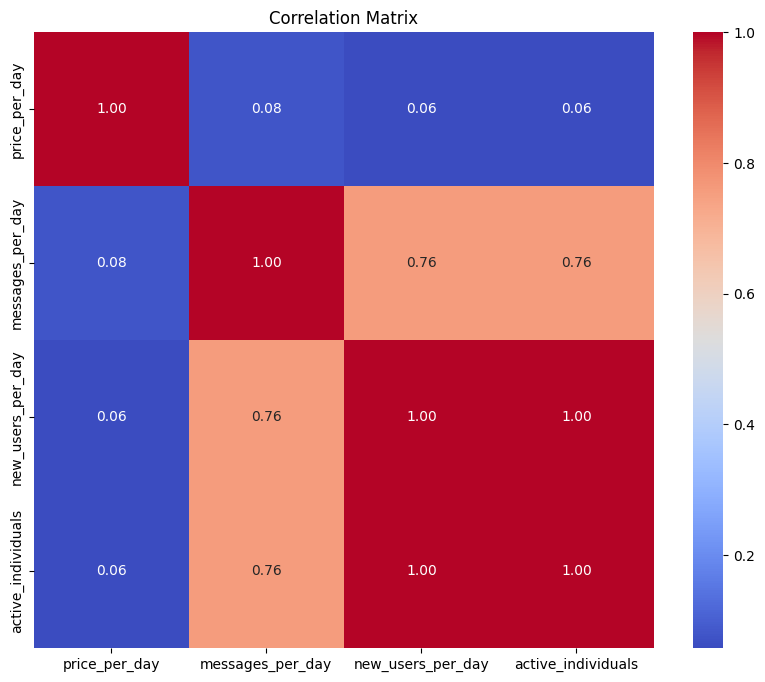

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the merged_df DataFrame containing the data

# Calculate correlation matrix
correlation_matrix = merged_df.corr()

# Create a heatmap using Seaborn and Matplotlib
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Here's how we can interpret the correlations:

$OCEAN Price and Messages per Day (0.078749):

There is a weak positive correlation between $OCEAN price and messages per day.
This indicates that there is a slight tendency for the number of messages per day to increase as the $OCEAN price increases, although the correlation is not very strong.
$OCEAN Price and New Users per Day (0.057707):

Similarly, there is a weak positive correlation between $OCEAN price and new users per day.
As the $OCEAN price increases, there is a slight tendency for the number of new users joining the server per day to increase, although the correlation is not very strong.
$OCEAN Price and Active Individuals (0.057707):

The correlation between $OCEAN price and active individuals is the same as the correlation with new users per day because the correlation coefficient is identical.
There is a weak positive correlation between $OCEAN price and active individuals, indicating that as the $OCEAN price increases, there is a slight tendency for more active individuals in the server.
Messages per Day and New Users per Day (0.757429):

There is a strong positive correlation between messages per day and new users per day.
This suggests that as the number of new users joining the server per day increases, the number of messages posted per day also tends to increase significantly.
Messages per Day and Active Individuals (0.757429):

The correlation between messages per day and active individuals is the same as the correlation with new users per day because the correlation coefficient is identical.
There is a strong positive correlation between messages per day and active individuals, indicating that as the number of active individuals in the server increases, the number of messages posted per day also tends to increase significantly.
Overall, while there are some correlations between $OCEAN price, server activity metrics, they are relatively weak compared to the strong correlation between messages per day and new users per day/active individuals. It's essential to consider additional factors and conduct further analysis to understand the dynamics between $OCEAN price and server activity more comprehensively.




